In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,8)

In [6]:
arr = np.arange(0, 12, 0.7) # расширение функции range()
print(arr)
# Массив из чего хотите
arr = np.full(shape=7, fill_value=np.exp(1), dtype=float)
print(arr)

[  0.    0.7   1.4   2.1   2.8   3.5   4.2   4.9   5.6   6.3   7.    7.7
   8.4   9.1   9.8  10.5  11.2  11.9]
[ 2.71828183  2.71828183  2.71828183  2.71828183  2.71828183  2.71828183
  2.71828183]


### Свойства массива

In [10]:
A = np.array([[3, 1, 4], [1, 5, 9], [2, 6, 5], [4, 1, 1]])

In [11]:
print(A.shape)
print(A.size)
print(A.ndim)

(4, 3)
12
2


Форму массива (`shape`) можно менять, но так, чтобы это согласовывалось с его размером (`size`) 

In [12]:
A = A.reshape((6,2))
A

array([[3, 1],
       [4, 1],
       [5, 9],
       [2, 6],
       [5, 4],
       [1, 1]])

In [13]:
A = A.flatten()
A

#!!!
# Это не тоже самое, что A = A.reshape((1, 12))

array([3, 1, 4, 1, 5, 9, 2, 6, 5, 4, 1, 1])

In [14]:
A = A.reshape((3,-1)) 
A

# -1 как бы означает, "сделай первую размерность равную 3, 
# а все остальное запихни во вторую, если получится

array([[3, 1, 4, 1],
       [5, 9, 2, 6],
       [5, 4, 1, 1]])

In [15]:
A.T # Транспонирование матрицы

array([[3, 5, 5],
       [1, 9, 4],
       [4, 2, 1],
       [1, 6, 1]])

###  Индексация

In [7]:
A = np.random.randint(0, 20, (5,6))
print(A)
# Небольшое дополнение
print(A[:, 2])
print(A[2, :])

[[10 19 14 13  2 13]
 [12 15  6  5  4  8]
 [ 8 18  3  2 18  4]
 [12  7 13 10  9  3]
 [17  5 15  8  7 19]]
[14  6  3 13 15]
[ 8 18  3  2 18  4]


###  Склейка массивов

In [29]:
a = np.random.randint(0, 10, (2, 5))
b = np.random.randint(0, 10, (2, 5))

print(a)
print(b)

[[6 0 1 6 5]
 [6 3 6 9 3]]
[[3 7 9 3 5]
 [5 8 4 4 9]]


In [30]:
A = np.r_[a,b]
A

array([[6, 0, 1, 6, 5],
       [6, 3, 6, 9, 3],
       [3, 7, 9, 3, 5],
       [5, 8, 4, 4, 9]])

In [31]:
A = np.concatenate((a,b), axis=0)
A

array([[6, 0, 1, 6, 5],
       [6, 3, 6, 9, 3],
       [3, 7, 9, 3, 5],
       [5, 8, 4, 4, 9]])

In [32]:
A = np.c_[a,b]
A

array([[6, 0, 1, 6, 5, 3, 7, 9, 3, 5],
       [6, 3, 6, 9, 3, 5, 8, 4, 4, 9]])

In [33]:
A = np.concatenate((a,b), axis=1)
A

array([[6, 0, 1, 6, 5, 3, 7, 9, 3, 5],
       [6, 3, 6, 9, 3, 5, 8, 4, 4, 9]])

### Операции и функции на массивах

**Задание**<br/>
Задайте два случайных массива $a$ и $b$ одинаковой длины. 

Вычислите следующие расстояния между массивами:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$


In [9]:
## Your code here
n = np.random.randint(4, 10)
a = np.random.randint(1, 10, size=n)
b = np.random.randint(1, 10, size=n)

print(np.sqrt(((a-b)**2).sum()))
print(np.abs(a-b).sum())
print(1 - ((a.T).dot(b))/(np.sqrt((a**2).sum())*np.sqrt((b**2).sum())))

10.5830052443
26
0.192389399721


**Задание**<br/>
Выполните загрузку данных, как указано ниже (может занять время).

Выберите случайную строчку из данных. Найдите другую "ближайшую" (по евклидовому расстоянию) к ней строчку и выведите её.

In [26]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

In [104]:
X = faces.data
# print(X.shape)
n = np.random.randint(0,401)
# img = X[n, :].reshape((64,64))
# plt.imshow(img, cmap=plt.cm.Greys)
x = X[n, :] #your data

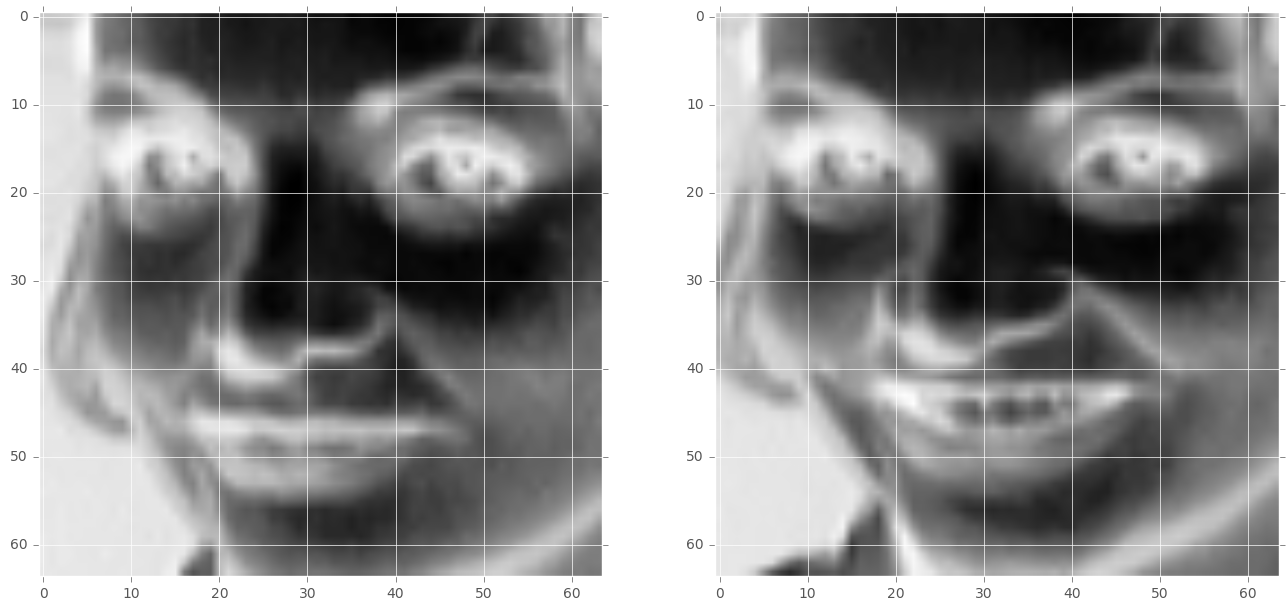

In [105]:
## Your code here
E = np.sqrt(((X-x)**2).sum(axis=1))
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X[np.argsort(E)[1], :].reshape((64,64)), cmap=plt.cm.Greys)
ax[1].imshow(X[n, :].reshape((64,64)), cmap=plt.cm.Greys)

### Аггрегация

Массивы можно аггрегировать - считать среднее значение, медиану, моду, максимум, минимум, сумму и тп

In [15]:
arr = np.random.rand(11)
print(arr)
print(arr.mean())
print(arr.sum())
print('максимальное значение %.4f находится на %d позиции' % (arr.max(), arr.argmax()))
# аналогично argmax, есть argmin и argsort

[ 0.69605529  0.83916242  0.34254923  0.54787378  0.99712159  0.97682207
  0.93199966  0.94803461  0.56586519  0.6828635   0.99148525]
0.774530236945
8.51983260639
максимальное значение 0.9971 находится на 4 позиции


In [29]:
print(np.median(arr)) # np.percentile(arr, 50)
print(np.percentile(arr, [15, 85])) #обобщение медианы (выбор элемента из заданной позиции. ДЛя медианы - 50)

0.839162423799
[ 0.55686949  0.98415366]


**Задание**<br/>
Сгенерируйте такой случайный вектор (`np.random.rand()`) длины 10, что сумма его элементов равна 2.

In [56]:
## Your code here
a = np.random.rand(10)
(a * 2/a.sum()).sum()

2.0

**Задание**<br/>
Сгенерируйте случайный вектор (`np.random.rand()`) длины 100. Выполните такое преобразование массива, что 
* Максимальному элементу(-ам) соответствовало число 1
* Минимальному элементу(-ам) соответствовало число 0
* Остальные элементы находились на интервале 0-1 с сохранением порядка

In [40]:
## Your code here
a = np.random.rand(100)
a = (a - a.min())/(a - a.min()).max()

**Задание**<br/>
Сгенерируйте случайный вектор длины 20 из целых чисел на интервале [0,50]. Оставьте в нем только те элементы что меньше 5 персентиля и больше 95 персентиля

In [58]:
## Your code here
a = np.random.randint(0, 51, 20)
print(a, len(a))
print(a[(a>np.percentile(a, 5)) & (a<np.percentile(a, 95))], len(a[(a>np.percentile(a, 5)) & (a<np.percentile(a, 95))]))

[19  2  3 12 49  6 50 14 21  4 10 12 38 48 40 50 38 33 10 12] 20
[19  3 12 49  6 14 21  4 10 12 38 48 40 38 33 10 12] 17


**Задание**<br/>
Сгенерируйте случайную матрицу размера $5 \times 6$ из целых чисел на интервале [0,50]. Выведите столбец с содержащий максимальное значение во всей матрице.

In [25]:
## Your code here
A = np.random.randint(0, 51, (5,6))
print(A[:, A.argmax()%6])

[ 3  9 22 49 36]


Для матриц можно считать значения по строкам/столбцам:

In [58]:
A = np.random.randint(0, 51, (5,6))
print(A.mean(axis=0))

[ 25.6  39.   32.   22.   22.4  32.4]


### Пропущенные значения

В `numpy` есть специальные обозначения для бесконечности и пропущенных значений.

В реальном мире приходится работать с очень "грязными" данными и частенько бывает, что какие-то измерения, значения признаков и тп просто отсутствуют. К этому надо быть готовым

In [35]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
print(arr)

# проверяем, является ли значение пропущенным
is_nan = np.isnan(arr)
# проверяем, есть ли хотя бы одно пропущенное
print(np.any(is_nan))
# проверяем, есть ли хотя бы одно пропущенное
print(np.all(is_nan))

[        nan  0.97511251         nan  0.89878811  0.45404293  0.69765395
  0.05280049         nan  0.1605157   0.69785118]
True
False


Аггрегация массивов с пропущенными значениями может выполняться без учета np.nan

In [36]:
print(np.nanmean(arr))
print(np.mean(arr))

0.562394979708
nan


**Задание**<br/>
Замените все пропущенные значение средним

In [49]:
## Your code here
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan
print(arr)
arr[np.isnan(arr)] = np.nanmean(arr)
print(arr)

[        nan  0.90170925         nan         nan         nan  0.51707852
  0.55661487  0.31729157  0.47040601  0.17230797]
[ 0.4892347   0.90170925  0.4892347   0.4892347   0.4892347   0.51707852
  0.55661487  0.31729157  0.47040601  0.17230797]


### Линейная регрессия (Пока бездумно)

Загрузите [файл 1](https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv?dl=0) и [файл 2](https://www.dropbox.com/s/f87gm612o144emx/tutorial_dataset_2.csv?dl=0) в папку с тетрадкой. С помощью функции `loadtxt` в модуле `numpy` загрузите табличные данные одного из файлов. Присвойте y = D[:,0] а X = D[:, 1:].

Сейчас мы воспользуемся одной магической формулой и построим модель линейной регрессии. Откуда эта формула берется мы узнаем на следующих занятиях.

Модель линейной регрессии в матричном виде выглядит так: $\hat{y} = X\hat{\beta}$, где

$$ \hat{\beta} = (X^T X)^{-1} X^T y $$
Остатки модели рассчитываются как
$$ \text{res} = y - \hat{y} $$

Итак, еще раз:

1. Загрузите данные
2. Оцените веса $\beta$ с помощью формулы
3. Постройте график, на котором по оси Y: остатки, а по оси X: $\hat{y}$

In [143]:
# load data
D = np.loadtxt('tutorial_dataset_1.csv', skiprows=1, delimiter=',')
D1 = np.loadtxt('tutorial_dataset_2.csv', skiprows=1, delimiter=',')
y = D[:, 0]
y1 = D1[:, 0]
X = D[:, 1:]
X1 = D1[:, 1:]

In [144]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
beta1 = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(y1)
y_1 = X.dot(beta)
y1_1 = X.dot(beta1)
res = y - y_1
res1 = y1 - y1_1
# plt.scatter(y1, res)
fig, ax = plt.subplots(1, 2)
ax[0].scatter(y_1, res)
ax[1].scatter(y1_1, res1)

ValueError: operands could not be broadcast together with shapes (2209,) (2010,) 

# Pandas
## Основные структуры

### Series

Основными структурами являются `Series` и `DataFrame`. <br/>
`Series` – это проиндексированный одномерный массив значений. Он похож на простой словарь типа `dict`, где имя элемента будет соответствовать индексу, а значение – значению записи.

Задать `Series` можно многими способами, например с помощью массива:

Колонка слева - это (строчный) индекс - некоторая нумерация записанных значений

In [125]:
ser = pd.Series(np.random.rand(5))
print(ser.index)
print(ser.values)
ser

RangeIndex(start=0, stop=5, step=1)
[ 0.1201526   0.77449207  0.64036807  0.77831548  0.73613833]


0    0.120153
1    0.774492
2    0.640368
3    0.778315
4    0.736138
dtype: float64

Но про то, как улучше находить нужные вам значения - чуть позже.

Индексом может быть что угодно, например:

In [129]:
ser = pd.Series(np.random.rand(5), index=['m', 'i', 'n', 'o', 'r'])
print(ser['r'])
print(ser['n':'o'])
ser

0.338429878072
n    0.123647
o    0.161952
dtype: float64


m    0.498489
i    0.723414
n    0.123647
o    0.161952
r    0.338430
dtype: float64

### Индексация

Индексация в `pandas` может временами может показаться запутанной

In [130]:
ser = pd.Series(np.random.rand(5), index=[1,3,5,6,9])
ser

1    0.074019
3    0.438184
5    0.849995
6    0.805941
9    0.790386
dtype: float64

In [131]:
ser[3]

0.43818434091840985

In [132]:
ser[3:5] #?!

6    0.805941
9    0.790386
dtype: float64

Поэтому придумали разные операторы для индексирования, чтобы можно было явно указать, когда вы хотите использовать **значения индекса**, а когда позицию.

In [133]:
ser.loc[3:5, ]

3    0.438184
5    0.849995
dtype: float64

In [134]:
ser.loc[:, ]

1    0.074019
3    0.438184
5    0.849995
6    0.805941
9    0.790386
dtype: float64

In [136]:
ser.loc[ser > 0.5, ]

5    0.849995
6    0.805941
9    0.790386
dtype: float64

**Индексация по позиции**

In [138]:
ser.iloc[3:5, ] #индексация по позиции

6    0.805941
9    0.790386
dtype: float64

Их же используйте для присваивания!!

In [141]:
ser.loc[ser > 0.5, ] = 0.5
ser

1    0.074019
3    0.438184
5    0.500000
6    0.500000
9    0.500000
dtype: float64

### DataFrame

`DataFrame` — это проиндексированный многомерный массив значений, соответственно каждый столбец `DataFrame`, является структурой `Series`. Индексирование в `DataFrame` ровно тоже, что и в `Series`, с тем отличием, что добавляется второе измерение.

In [145]:
df = pd.DataFrame(np.random.randn(10, 3), index=range(10), columns=['A', 'B', 'C'])

In [146]:
df.head() # выводит первые 5 (по-умолчанию) строк таблицы

A         B         C
0  0.047490 -0.237348  1.467556
1 -1.097600 -0.028783  0.253082
2  1.056723 -1.415287  0.189677
3 -1.075655 -1.462933  1.784468
4 -0.505730 -0.683133 -0.958403

In [148]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=10, step=1)
Index(['A', 'B', 'C'], dtype='object')


In [149]:
df.loc[1:3, ['A', 'B']]

A         B
1 -1.097600 -0.028783
2  1.056723 -1.415287
3 -1.075655 -1.462933

In [150]:
df.iloc[1:3, 0:2]

A         B
1 -1.097600 -0.028783
2  1.056723 -1.415287

`DataFrame` тоже можно транспонировать!

In [151]:
df.T

0         1         2         3         4         5         6  \
A  0.047490 -1.097600  1.056723 -1.075655 -0.505730 -0.130036 -0.999364   
B -0.237348 -0.028783 -1.415287 -1.462933 -0.683133  0.831442 -0.349642   
C  1.467556  0.253082  0.189677  1.784468 -0.958403 -1.897727  0.899163   

          7         8         9  
A  1.105330 -0.599366  0.137265  
B  0.715103  1.804412 -0.255265  
C -0.026513  0.231329 -0.644956

In [152]:
# Краткая описательная статистика
df.describe() 

# Кстати, это тоже DataFrame

A          B          C
count  10.000000  10.000000  10.000000
mean   -0.206094  -0.108143   0.129768
std     0.811526   1.010834   1.108967
min    -1.097600  -1.462933  -1.897727
25%    -0.899365  -0.599760  -0.490345
50%    -0.317883  -0.246306   0.210503
75%     0.114821   0.529132   0.737643
max     1.105330   1.804412   1.784468

Аггрегация в DataFrame (по-умолчанию) происходит по стоблцам

In [153]:
df.mean()

A   -0.206094
B   -0.108143
C    0.129768
dtype: float64

In [161]:
df['A'].mean()

0.0

Перевод данных в нужный тип

In [157]:
df['A'] = df['A'].astype(int)
df.head()

A         B         C
0  0 -0.237348  1.467556
1 -1 -0.028783  0.253082
2  1 -1.415287  0.189677
3 -1 -1.462933  1.784468
4  0 -0.683133 -0.958403

In [163]:
print('Количество уникальных значений в столбце А = %d' % df.A.nunique())

Количество уникальных значений в столбце А = 3


In [164]:
print('Самые большие значения в стоблце B :')
print(df.B.nlargest(2))

# Гораздо быстрее, чем df.B.sort(ascending=False).iloc[:2]

Самые большие значения в стоблце B :
8    1.804412
5    0.831442
Name: B, dtype: float64


Важно следить за данными, которые у вас хранятся в `DataFrame`

In [165]:
df.dtypes

A      int32
B    float64
C    float64
dtype: object

In [166]:
df.loc[0, 'A'] = 'lalaley'
df.head()

A         B         C
0  lalaley -0.237348  1.467556
1       -1 -0.028783  0.253082
2        1 -1.415287  0.189677
3       -1 -1.462933  1.784468
4        0 -0.683133 -0.958403

In [168]:
df['A']

0    lalaley
1         -1
2          1
3         -1
4          0
5          0
6          0
7          1
8          0
9          0
Name: A, dtype: object

Удаление\добавление строк\столбцов

In [169]:
df.head()

A         B         C
0  lalaley -0.237348  1.467556
1       -1 -0.028783  0.253082
2        1 -1.415287  0.189677
3       -1 -1.462933  1.784468
4        0 -0.683133 -0.958403

In [176]:
df.drop(0, axis=0)
# Пока df не изменился !

A         B         C    D
1   -1 -0.028783  0.253082  NaN
2    1 -1.415287  0.189677  NaN
3   -1 -1.462933  1.784468  NaN
4    0 -0.683133 -0.958403  NaN
5    0  0.831442 -1.897727  NaN
6    0 -0.349642  0.899163  NaN
7    1  0.715103 -0.026513  NaN
8    0  1.804412  0.231329  NaN
9    0 -0.255265 -0.644956  NaN
10   0  0.000000  0.000000  0.0

In [180]:
df.drop('A', axis=1)

B         C    D
0  -0.237348  1.467556  NaN
1  -0.028783  0.253082  NaN
2  -1.415287  0.189677  NaN
3  -1.462933  1.784468  NaN
4  -0.683133 -0.958403  NaN
5   0.831442 -1.897727  NaN
6  -0.349642  0.899163  NaN
7   0.715103 -0.026513  NaN
8   1.804412  0.231329  NaN
9  -0.255265 -0.644956  NaN
10  0.000000  0.000000  0.0

In [172]:
df.loc[:, 'D'] = np.nan
df.head()

A         B         C   D
0  lalaley -0.237348  1.467556 NaN
1       -1 -0.028783  0.253082 NaN
2        1 -1.415287  0.189677 NaN
3       -1 -1.462933  1.784468 NaN
4        0 -0.683133 -0.958403 NaN

In [173]:
df.loc[10, :] = 0
df.tail()

A         B         C    D
6   0 -0.349642  0.899163  NaN
7   1  0.715103 -0.026513  NaN
8   0  1.804412  0.231329  NaN
9   0 -0.255265 -0.644956  NaN
10  0  0.000000  0.000000  0.0

### Продолжим обучение на "реальных данных"

В 1968 году была [опубликована](http://www.ncbi.nlm.nih.gov/pubmed/5676802) статья под интригующем названием Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects.

К статье приложен небольшой набор [данных](https://www.dropbox.com/s/ui14yeeckbc6z7c/drugs-and-math.csv?dl=0), состоящий из 7 наблюдений

In [181]:
df = pd.read_csv('drugs-and-math.csv', index_col=0, sep=',')

In [187]:
df.head(7)

Drugs  Score
0   1.17  78.93
1   2.97  58.20
2   3.26  67.47
3   4.69  37.47
4   5.83  45.65
5   6.00  32.92
6   6.41  29.97

In [184]:
print(df.shape)
print(df.columns)
print(df.index)

(7, 2)
Index(['Drugs', 'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


Таблица уже отсортирована по колонке Drugs - отсортируем по колонке Score

In [189]:
df = df.sort_values('Score', ascending=False)

In [191]:
df.head(7)

Drugs  Score
0   1.17  78.93
2   3.26  67.47
1   2.97  58.20
4   5.83  45.65
3   4.69  37.47
5   6.00  32.92
6   6.41  29.97

In [192]:
df.describe().T # Иногда так лучше

count       mean        std    min     25%    50%     75%    max
Drugs    7.0   4.332857   1.935413   1.17   3.115   4.69   5.915   6.41
Score    7.0  50.087143  18.610854  29.97  35.195  45.65  62.835  78.93

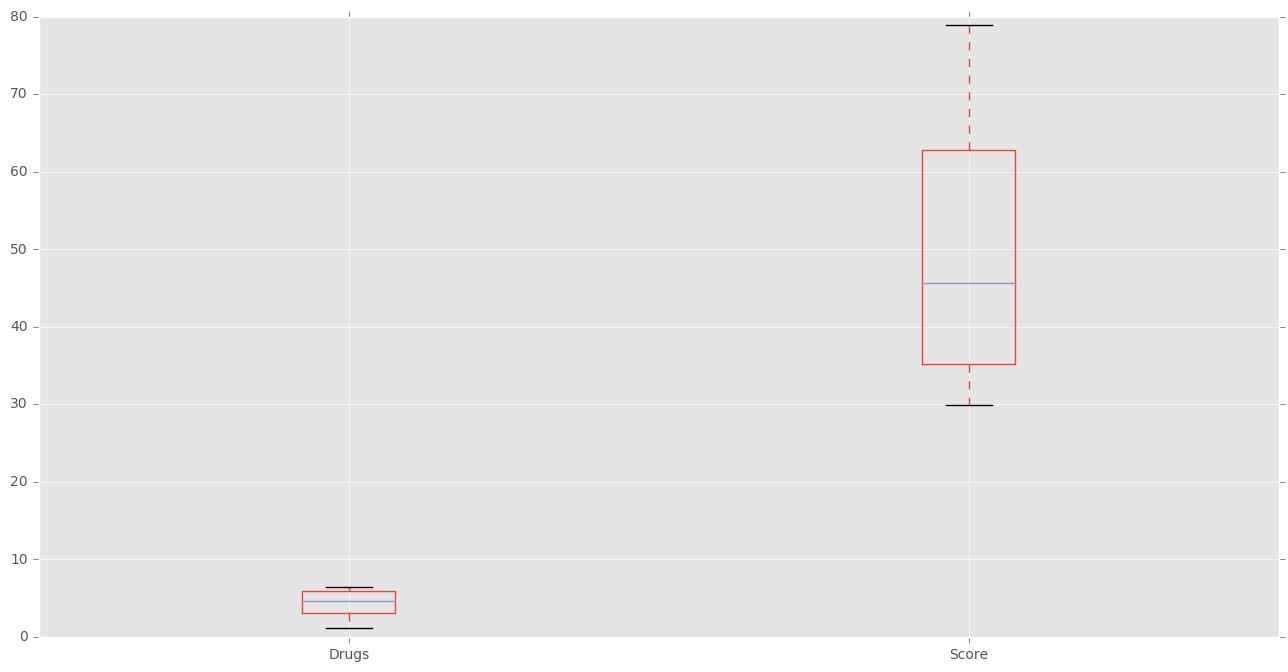

In [193]:
df.plot(kind='box')

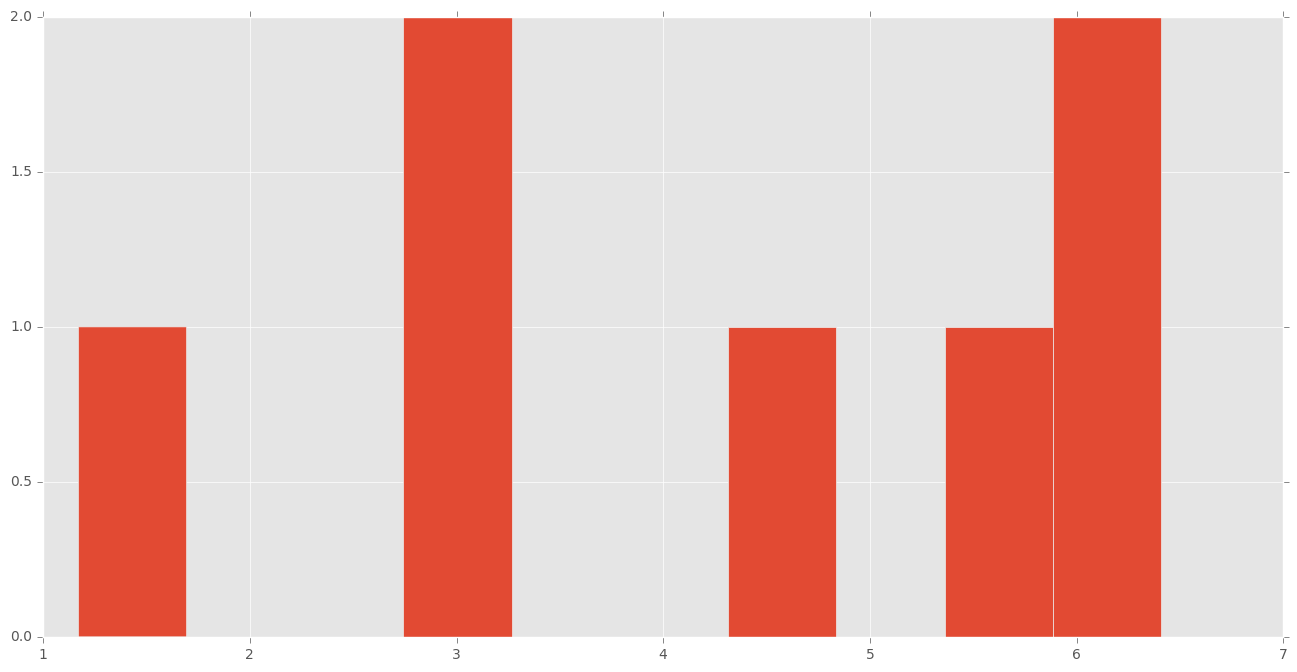

In [195]:
df.Drugs.hist()

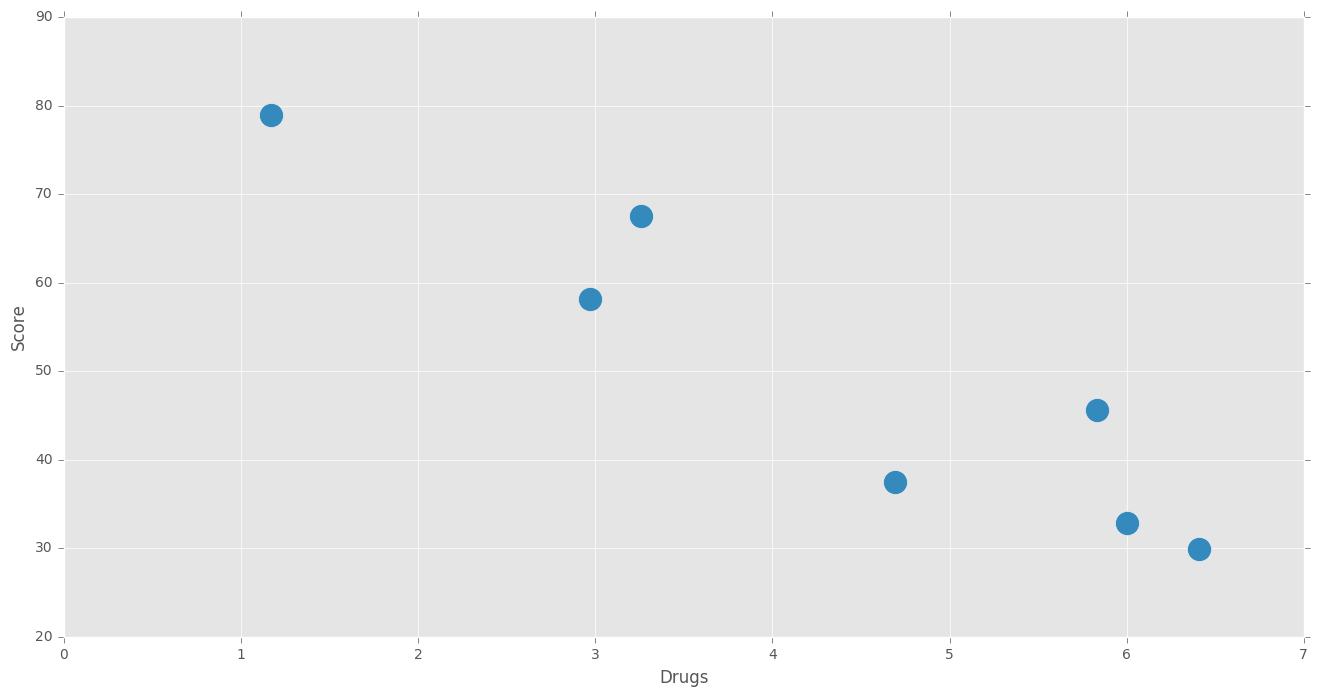

In [194]:
# df.plot(x='Drugs', y='Score')
df.plot(x='Drugs', y='Score', kind='scatter', s=300)

In [197]:
df.corr()

Drugs     Score
Drugs  1.000000 -0.936928
Score -0.936928  1.000000

Мы явно видим тенденцию..